# Test: Minimum error discrimination

In this notebook we are testing the evolution of the error probability with the number of evaluations.

In [1]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

plt.style.use('ggplot')

In [2]:
def callback(params, results, prob_error, prob_inc, prob):
    data.append(prob_error)

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0], [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
optimal = nnd.helstrom_bound(ψ, ϕ)

print(f'Optimal results: {optimal}\nActual results: {results}')

Optimal results: 0.07991303189489574
Actual results: (array([ -3.29354026,   3.53582746,   5.39157887,   6.25021837,
         9.3503971 ,  -7.00056362,   1.24510175,  14.37593205,
         5.68755935, -10.81638408,  -1.62332629]), 0.087890625, 200)


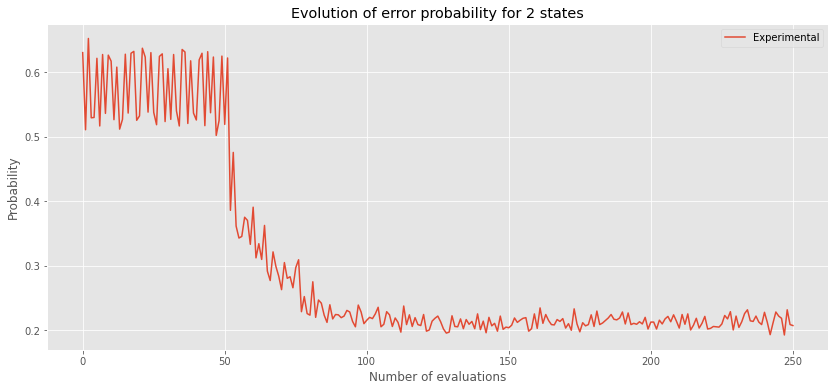

In [4]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 2 states')
plt.show()

In [5]:
fig.savefig('twostates.png')

In [6]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 1.17444891,  0.63608651,  0.0322244 ,  0.15680895,  0.72109612,
        3.11015201,  2.81688454,  0.45163704, -1.08592032,  0.58812572,
        0.62176868, -0.76325032, -0.97705362,  0.83822967,  0.75673792,
       -0.78596196, -0.54482142,  0.24190522, -0.3218406 ]), 0.3424479166666667, 200)


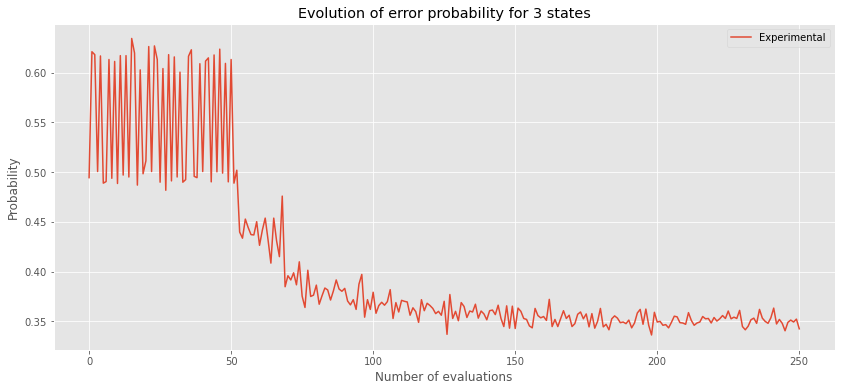

In [7]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states')
plt.show()

In [8]:
fig.savefig('3states.png')

In [9]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 1.84826978,  1.59802698,  0.90864327, -1.05698179, -0.16107527,
        3.17697614,  3.12103547,  0.65346074,  1.19252562, -0.4464496 ,
        1.11597114, -1.70192912, -0.20473353, -0.32272404, -0.31327724,
       -0.01113776,  0.46288015,  1.41755416, -0.97351418]), 0.41015625, 200)


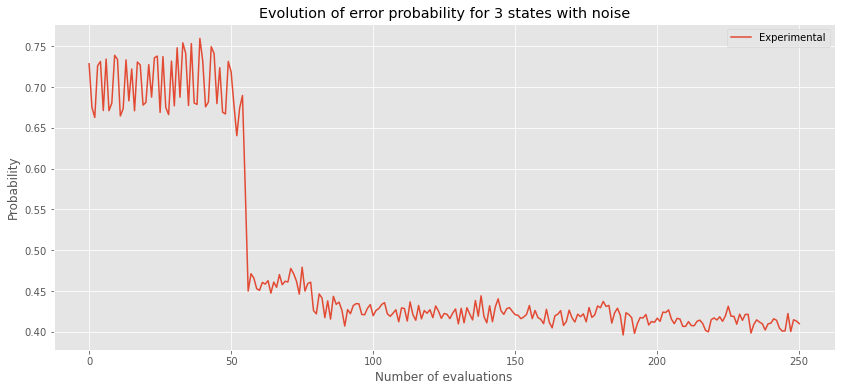

In [10]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states with noise')
plt.show()

In [11]:
fig.savefig('noisy.png')